In [1]:
#1. Add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error as msle
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
data = pd.read_csv('vcb.csv')
data

,Date,Price,Open,High,Low,Mass,Change
0,02/01/2018,41700.0,40942.0,42003.0,40638.0,3.57M,1.29%
1,03/01/2018,41624.0,42079.0,42230.0,41321.0,2.35M,-0.18%
2,04/01/2018,42003.0,41396.0,42003.0,41169.0,2.54M,0.91%
3,05/01/2018,40942.0,41776.0,41776.0,40866.0,2.61M,-2.53%
4,08/01/2018,42003.0,40942.0,42079.0,40183.0,2.64M,2.59%
...,...,...,...,...,...,...,...
1483,11/12/2023,84200.0,85000.0,85300.0,84100.0,1.40M,-0.94%
1484,12/12/2023,84200.0,84700.0,84700.0,84000.0,1.01M,0.00%
1485,13/12/2023,83700.0,84200.0,84500.0,83700.0,1.15M,-0.59%
1486,14/12/2023,84400.0,84000.0,84500.0,84000.0,840.60K,0.84%


In [3]:
# Xử lý dữ liệu
prices = data['Price']

In [4]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [5]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.8)
test_size = int(len(scaled_prices) * 0.2)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [6]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [7]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [8]:
X_train.shape

(1160, 30, 1)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_steps,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100

19/19 [==============================] - 4s 15ms/step - loss: 0.0448
Epoch 2/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0059
Epoch 3/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0028
Epoch 4/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0024
Epoch 5/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0022
Epoch 6/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0021
Epoch 7/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 8/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 9/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 10/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 11/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 12/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0017
Epoch 13/100
19/19 [====

In [12]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

9/9 [==============================] - 1s 5ms/step
[[1489]
 [1490]
 [1491]
 [1492]
 [1493]
 [1494]
 [1495]
 [1496]
 [1497]
 [1498]
 [1499]
 [1500]
 [1501]
 [1502]
 [1503]
 [1504]
 [1505]
 [1506]
 [1507]
 [1508]
 [1509]
 [1510]
 [1511]
 [1512]
 [1513]
 [1514]
 [1515]
 [1516]
 [1517]
 [1518]]
1/1 [==============================] - 0s 18ms/step
[88910.52  89057.29  89419.164 88638.766 89326.92  88440.016 86352.13
 85579.48  86148.03  87654.87  88105.016 85938.195 85720.44  86699.55
 86980.86  85831.64  85881.19  86069.945 86026.31  85408.24  84912.7
 85148.56  86100.5   85828.31  85905.77  85537.52  85226.945 84601.195
 84438.266 84112.414]


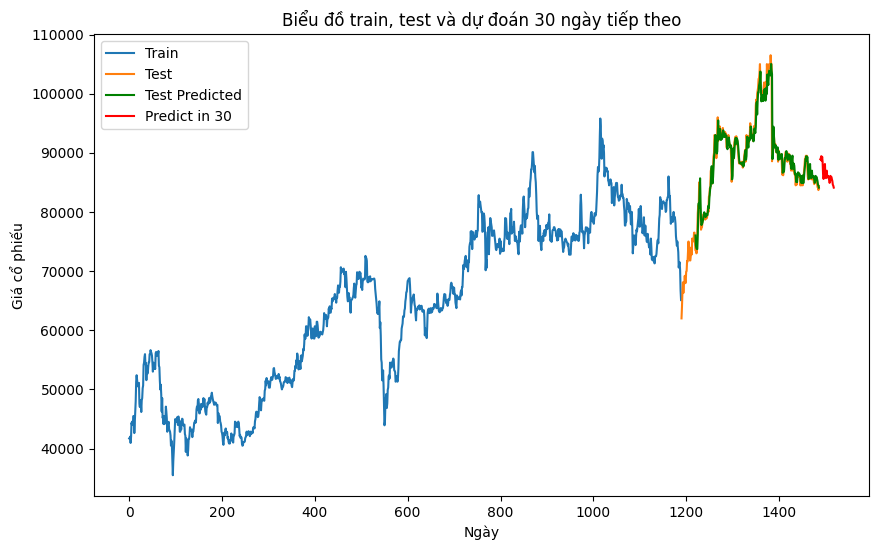

In [13]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




9/9 [==============================] - 0s 5ms/step


In [15]:
mape_test *= 100


print('---------TEST----------')
print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 1.24
MAE: 1116.099
RMSE: 1690.774
MSLE: 0.019
-------------------
